<a href="https://colab.research.google.com/github/kunalmahadik/ML-Regression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## **Importing Dataset**

In [ ]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2 - Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding = 'latin')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Creating a copy of the dataset
bike_df = df.copy()

In [ ]:
# Checking the names of the features in the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# The features after renaming them
print('The features in the dataset:')
bike_df.columns

The features in the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
bike_df.shape

(8760, 14)



*   There are 8760 records and 14 features in the dataset. 
*   rented_bike_count is the dependent variable



In [ ]:
# Checking the basic information of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking the descriptive statistics of the dataset
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# Glance through the unique values
print(bike_df['Seasons'].unique())
print(bike_df['Holiday'].unique())
print(bike_df['Functioning Day'].unique())
print(bike_df['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


We have the records of bike sharing from 01/12/2017 to 30/11/2018 which  corresponds to 1 year.

### <b> Feature Description </b>

* ### **Date** : *The date of the day, type:str*
* ### **Rented Bike Count** - *Number of rented bikes per hour and it is also a dependent variable, type:int*
* ### **Hour** - *Hour of the day ranging from 0-23, type: int*
* ### **Temperature (°C)**-*Temperature in Celsius, type:float*
* ### **Humidity(%)** - *Humidity in the air in %, type: int*
* ### **Wind speed (m/s)** - *Speed of the wind in m/s, type: float*
* ### **Visibility (10m)** - *Visibility in m, type: int*
* ### **Dew point temperature(°C)** - *The temperature at which the water starts to condense out of the air, type: float*
* ### **Solar Radiation (MJ/m2)** - Electromagnetic radiation emitted by the Sun, type: float
* ### **Rainfall(mm)** - Amount of rainfall in mm, type: float *italicized text*
* ### **Snowfall(cm)** - *Amount of snowfall in cm, type: float*
* ### **Seasons** - *Season of the year, type: str*
* ### **Holiday** - *If the day is holiday or not, type: str*
* ### **Functioning Day** - *Whether the day is functional or not, type:str*




## Data Preparation and Cleaning

In [ ]:
# Missing Values Check
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64



*   As we can see from above result that there are no missing values




### <b> Duplicate Values </b>


In [ ]:
dup_no = len(bike_df[bike_df.duplicated()])
print('The number of duplicated rows in the dataset are: ', dup_no)

The number of duplicated rows in the dataset are:  0




*   There are not any duplicate rows and missing values in the dataset
*   Some feature names are quite lengthy, lets rename the features 



### **Renaming the features**


In [ ]:
# Renaming the feature names

bike_df = bike_df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
#Converting the 'date' feature from string to datetime 
bike_df['date'] = bike_df['date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))


In [ ]:
# extracting the year and month from the date feature
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['weekday'] = bike_df['date'].dt.weekday

In [ ]:
# creating a new column of'weekdays_weekend' 
bike_df = bike_df.drop(columns = ['date'], axis = 1)

In [ ]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


In [ ]:
print(bike_df['weekday'].unique())

[4 5 6 0 1 2 3]


In [ ]:
# since the weekdays are in range 0-6 lets convert it to 1-7
bike_df['weekday'] = np.array(bike_df['weekday']) + 1
bike_df['weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [ ]:
# Lets see the number of bikes rented per weekday
bike_rented_per_weekday = pd.DataFrame(bike_df['rented_bike_count'].groupby(bike_df['weekday']).sum().reset_index().sort_values('weekday', ascending = True))
bike_rented_per_weekday

,weekday,rented_bike_count
0,1,911743
1,2,858596
2,3,923956
3,4,861999
4,5,950334
5,6,885492
6,7,780194


In [ ]:
# The number of bikes rented each month of year 2017 and 2018
bike_df.groupby(['year', 'month']).agg({'rented_bike_count':['sum']}).reset_index()

,year,month,rented_bike_count
,,,sum
0,2017,12,185330
1,2018,1,150006
2,2018,2,151833
3,2018,3,380594
4,2018,4,524227
5,2018,5,707088
6,2018,6,896887
7,2018,7,734460
8,2018,8,651887


In [ ]:
bike_df['months_string'] = bike_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


In [ ]:
import plotly.express as px

In [ ]:
#creating a month year group
month_year_groups = bike_df.groupby(by = ['month', 'months_string', 'year']).agg({'rented_bike_count': 'sum'}).reset_index()


In [ ]:
#bar plot for diffrent year
px.bar(month_year_groups,y= 'rented_bike_count',x='months_string' ,facet_row= 'year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=1000, height=800)




*   From the above barplot, count of bikes rented is highest in month of July and year 2018.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



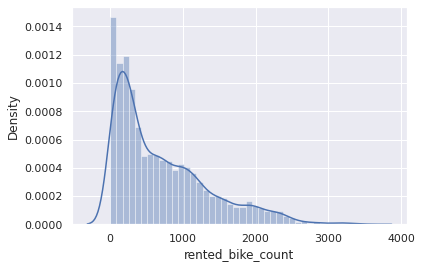

In [ ]:
# Checking the distribution of the dependent variable
sns.distplot(bike_df['rented_bike_count'])
sns.set(rc = {'figure.figsize': (10,5)})




*   From the above distribution plot the dependent variable looks skewed.
*   The rented bike count data is positively skewed



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



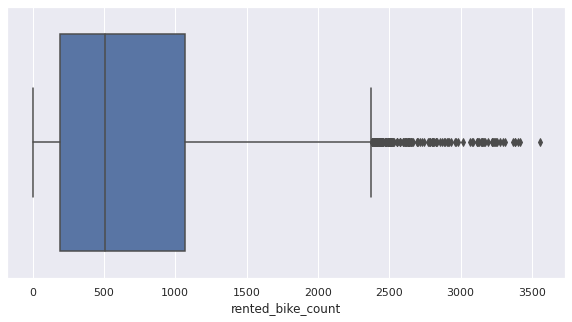

In [ ]:
sns.boxplot(bike_df['rented_bike_count'])



*   The above boxplot shows that there are outliers in the rented bike count data




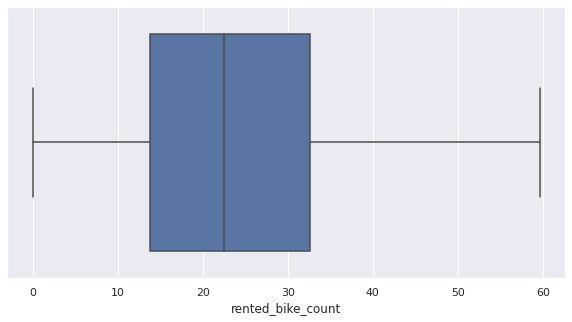

In [ ]:
# Applying square root transformation as it normalize the skewed data
sns.boxplot(x = np.sqrt(bike_df['rented_bike_count']))



* After square root transformation outliers have been removed.
* Our model works best when the data is normally distributed.







### Exploring Categorical Features

In [ ]:
categorical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes == 'O']
print('The categorical features in the dataset are:',categorical_feat)

The categorical features in the dataset are: ['seasons', 'holiday', 'func_day', 'months_string']


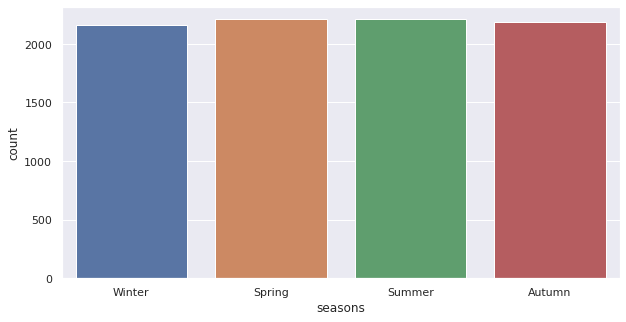

In [ ]:
# Count plot for different seasons
sns.countplot(x = 'seasons', data = bike_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



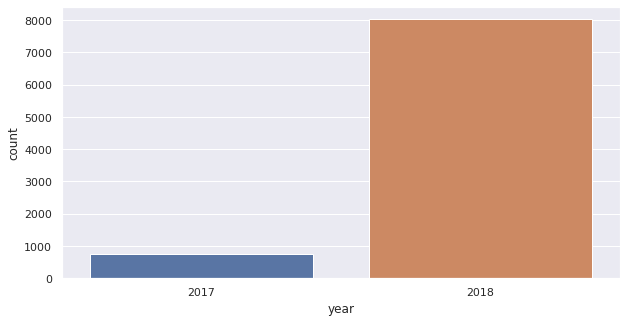

In [ ]:
# countplot of year
sns.countplot(bike_df['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



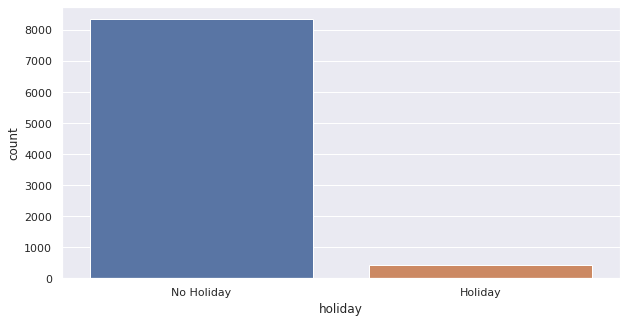

In [ ]:
sns.countplot(bike_df['holiday'])

Finding relation between various features and dependent variable using Bar plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



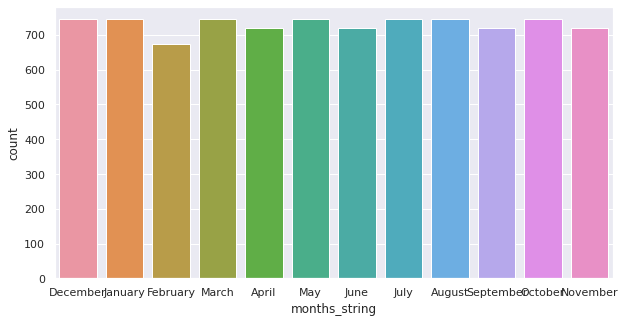

In [ ]:
sns.countplot(bike_df['months_string'])
sns.set(rc = {'figure.figsize': (10,5)})

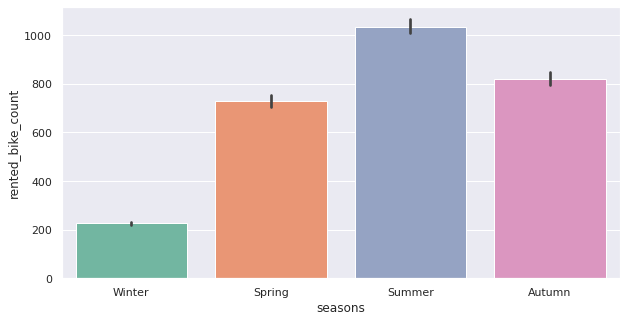

In [ ]:
# Finding relation between seasons and rented bike count
sns.barplot(x = 'seasons', y = 'rented_bike_count', data = bike_df, palette = 'Set2')

Rented bike count is significantly less in Winter whereas high on summer

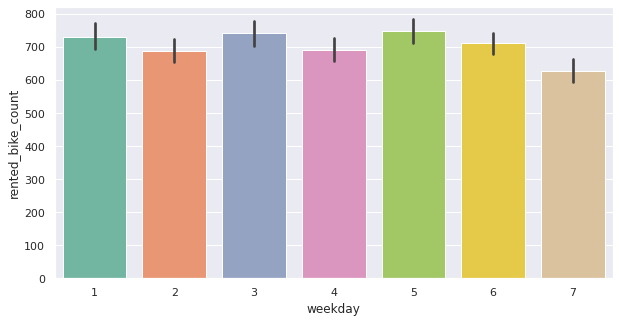

In [ ]:
# plot for the rented bike count against weekday
sns.barplot( x= 'weekday', y = 'rented_bike_count', data = bike_df, palette = 'Set2')

In all days, the bike count is more or less the same

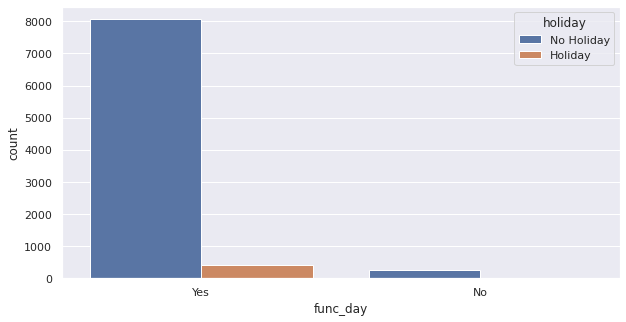

In [ ]:
# Understanding the functioning day and holiday
sns.countplot(x = 'func_day', hue = 'holiday', data = bike_df)

We see that people are renting bike on non holidays.

### Exploring Numerical Features

In [ ]:
numerical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes != 'O' and feature not in ['weekday', 'month', 'date', 'year', 'rented_bike_count'] ]
numerical_feat

['hour',
 'temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

Understanding the relation between various numerical features and dependent variable



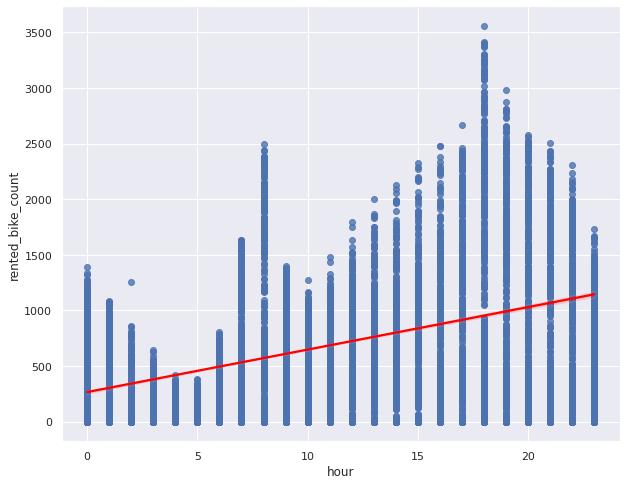

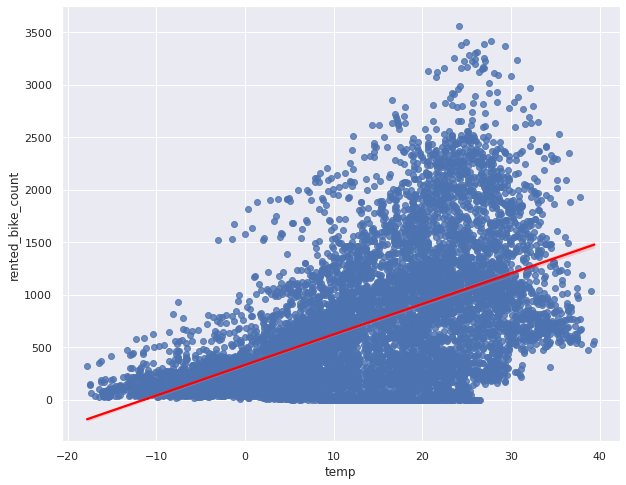

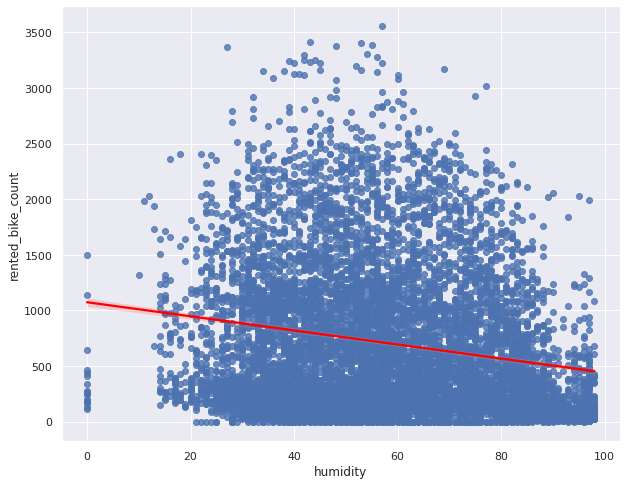

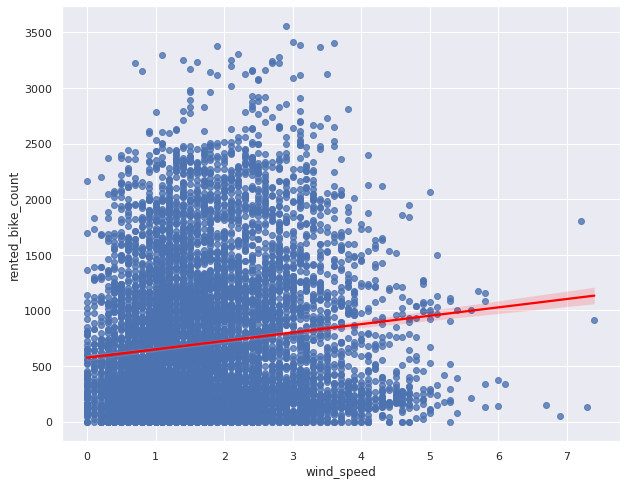

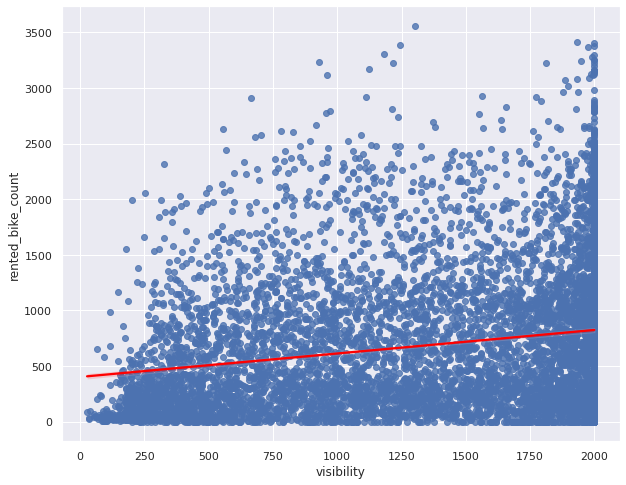

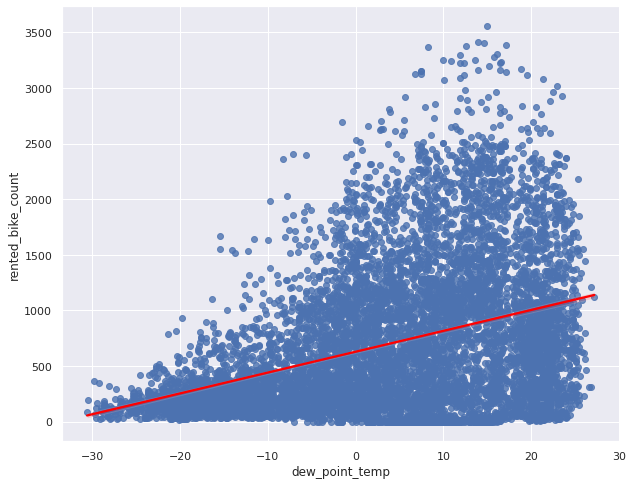

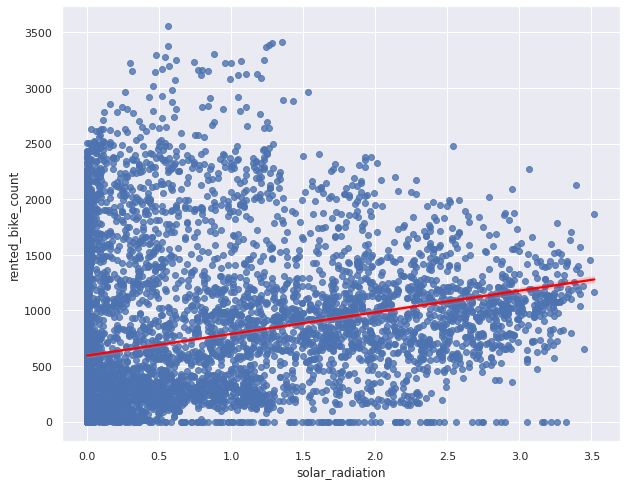

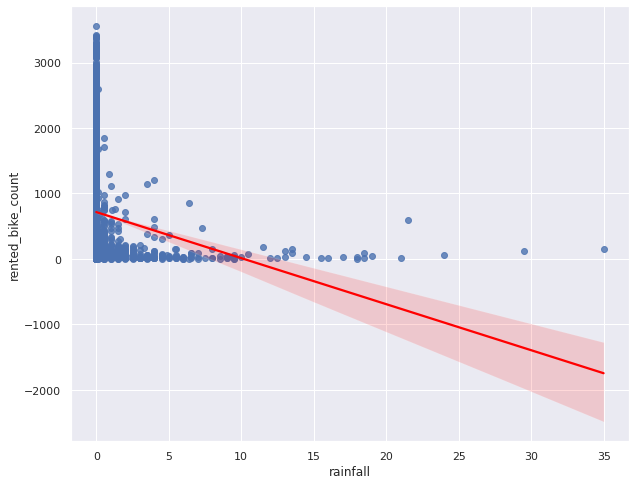

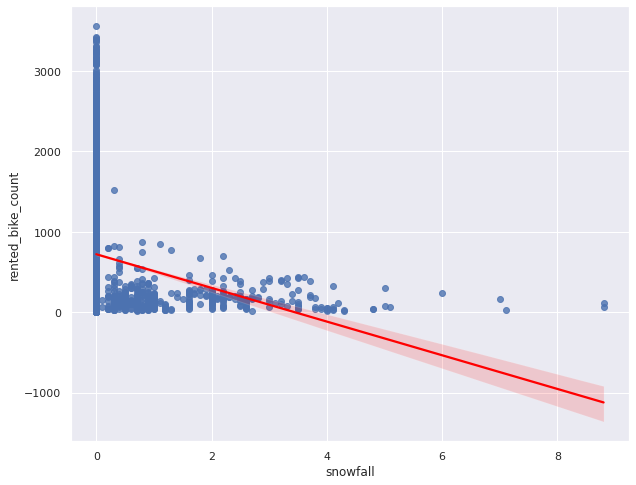

In [ ]:
# Plotting regression plot for each numerical feature 
plt.rcParams['figure.figsize'] = (10,8)
for feat in numerical_feat:
  plt.figure()
  sns.regplot( x =bike_df[feat], y = bike_df['rented_bike_count'], line_kws={"color": "Red"})

### Observation on relation between numerical fatures and dependent variable



*   **hour** - The demand for bike increases throughout the day, maximum at around 6 pm.
*   **temp** - Temperature is positively correlated with the people using bikes. The maximum is between 20 °C and 30 °C.
*   **humidity** - Humidity is the amount of water vapor in the air. Looking at the reg plot, people prefer using bikes when there is less humidity.
*   **visibility** - Visibility does not affect much still showing a slight positive correlation with people renting bike.
*   **snowfall and rainfall** - People don't prefer renting bike when there is ranifall or snowfall. 
*   **dew_point_temp** - The dew point temperature is positively correlated to the dependent variable.
*   **wind_speed** - The wind speed don't affect much the dependent variable.
*   **Solar_radiation** - Solar radiation seems to slightly positive correlated with the dependent variable.














###Understanding relation between other features and dependent variable

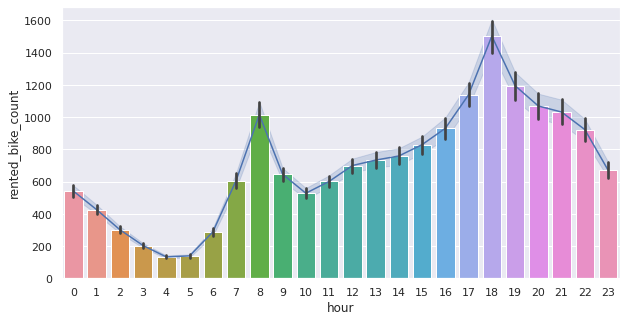

In [ ]:
# bar plot between hour and rented bike count
plt.figure(figsize = (10,5))
sns.lineplot( x = bike_df['hour'], y = bike_df['rented_bike_count'])
sns.barplot(x = bike_df['hour'], y = bike_df['rented_bike_count'])

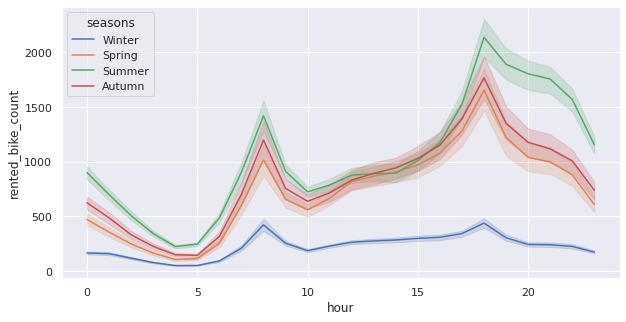

In [ ]:
# line plot of hour vs rented bike count with respect to seasons
plt.figure(figsize = (10,5))
sns.lineplot(data = bike_df, x = 'hour', y = 'rented_bike_count', hue = 'seasons')



* The above plot indicates that people prefer renting bike more in summer season and least in winter season.
* The plot also indicates that people prefer renting bike in the evening at around 4pm to 8pm.



## Lets understand the correlation between variables.

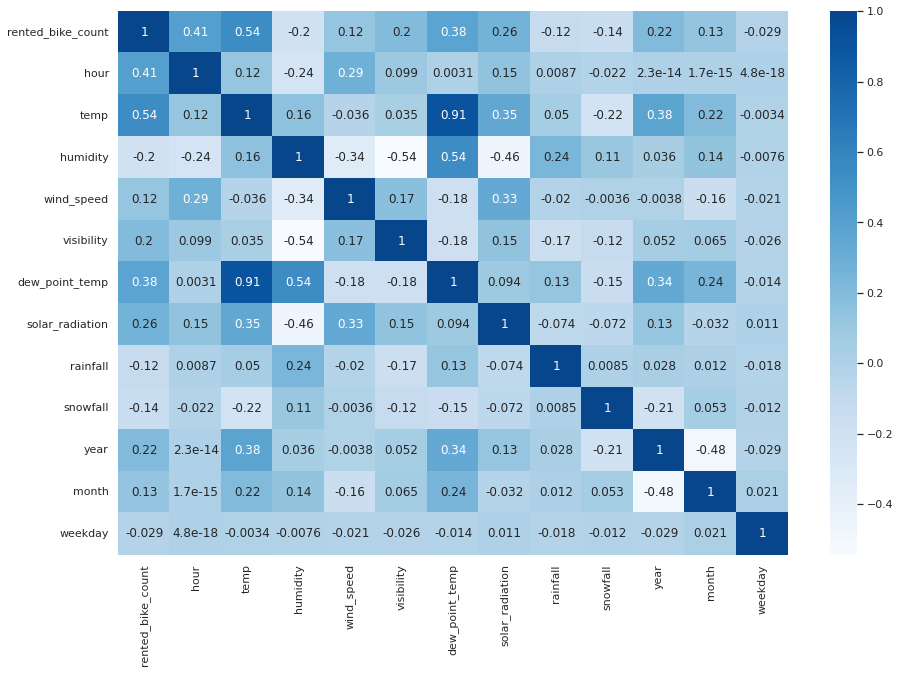

In [ ]:
# Understanding correlation using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues', center = 0.3)



*   Hour and temperature are highly correlated with bike count as compared to other features.
*  Dew point temp and temperature are highly correlated with each other, we can add them together.



In [ ]:
# Lets drop the columns which are not important
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,months_string
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December


In [ ]:
bike_df.drop(['months_string'], axis = 1, inplace = True)

In [ ]:
bike_df.head(2)

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5


In [ ]:
# creating new features
bike_df['Temperature_and_dew_temp'] = bike_df['temp'] + bike_df['dew_point_temp']
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,Temperature_and_dew_temp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,-22.8
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,-23.1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,-23.7
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,-23.8
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,-24.6


In [ ]:
bike_df.drop(['temp', 'dew_point_temp'], axis =1, inplace = True)

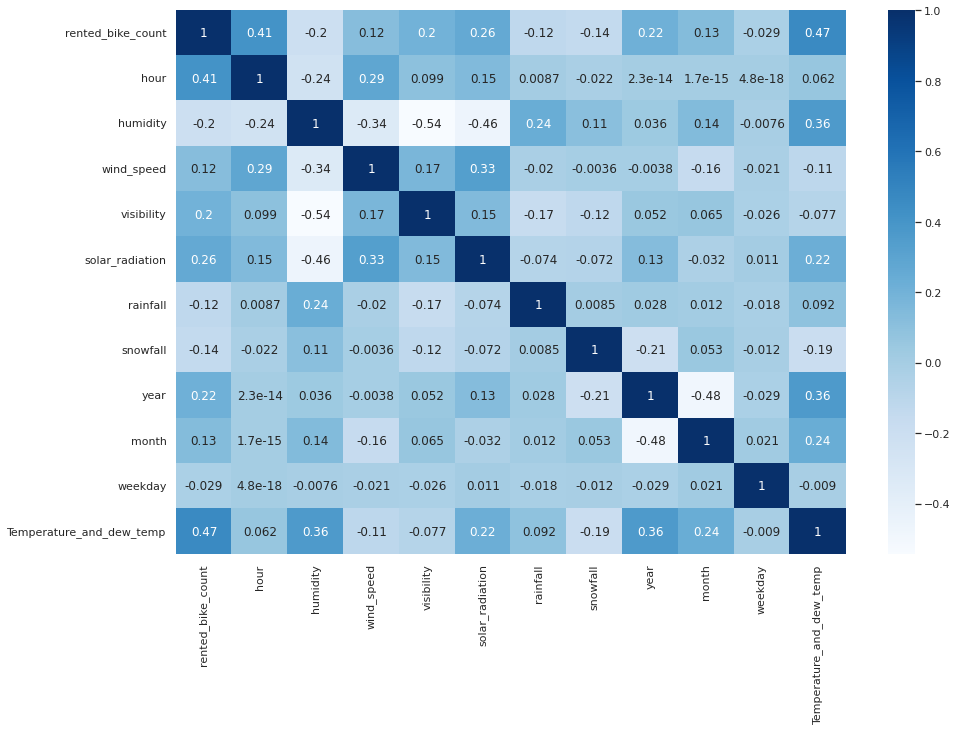

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues')